# Load Dataset with Kaggle API

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

In [3]:
# Download the dataset
dataset = 'fahmidachowdhury/e-commerce-sales-analysis'
api.dataset_download_files(dataset, path='e-commerce-sales-analysis', unzip=False)

In [4]:
# Unzip the dataset
with zipfile.ZipFile("e-commerce-sales-analysis/e-commerce-sales-analysis.zip", 'r') as file:
    file.extractall("e-commerce-sales-analysis")

In [5]:
# List the files in the unzipped directory to find the correct csv file name
print(os.listdir("e-commerce-sales-analysis"))

['e-commerce-sales-analysis.zip', 'ecommerce_sales_analysis.csv']


In [7]:
# Load the data
df = pd.read_csv("e-commerce-sales-analysis/ecommerce_sales_analysis.csv")
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


# Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   price           1000 non-null   float64
 4   review_score    1000 non-null   float64
 5   review_count    1000 non-null   int64  
 6   sales_month_1   1000 non-null   int64  
 7   sales_month_2   1000 non-null   int64  
 8   sales_month_3   1000 non-null   int64  
 9   sales_month_4   1000 non-null   int64  
 10  sales_month_5   1000 non-null   int64  
 11  sales_month_6   1000 non-null   int64  
 12  sales_month_7   1000 non-null   int64  
 13  sales_month_8   1000 non-null   int64  
 14  sales_month_9   1000 non-null   int64  
 15  sales_month_10  1000 non-null   int64  
 16  sales_month_11  1000 non-null   int64  
 17  sales_month_12  1000 non-null   in

In [10]:
df.shape

(1000, 18)

In [12]:
# Check for duplicates
df.duplicated().sum()

0

In [13]:
# Check for missing values
df.isnull().sum()

product_id        0
product_name      0
category          0
price             0
review_score      0
review_count      0
sales_month_1     0
sales_month_2     0
sales_month_3     0
sales_month_4     0
sales_month_5     0
sales_month_6     0
sales_month_7     0
sales_month_8     0
sales_month_9     0
sales_month_10    0
sales_month_11    0
sales_month_12    0
dtype: int64

In [15]:
df.describe()

,product_id,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


In [17]:
# Create a new column for total sales of each product
df['total_sales'] = df.iloc[:,6:].sum(axis=1)
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393,5515
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474,4511
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654,5527
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394,4546


In [18]:
# Create a new column for average monthly sales
df['average_monthly_sales'] = df['total_sales'] / 12
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,average_monthly_sales
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421,535.083333
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027,502.250000
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580,465.000000
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022,418.500000
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094,507.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393,5515,459.583333
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474,4511,375.916667
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654,5527,460.583333
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394,4546,378.833333


In [19]:
# Create a new column for total revenue
df['total_revenue'] = df['total_sales'] * df['price']
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,...,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,average_monthly_sales,total_revenue
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,...,904,446,603,807,252,695,306,6421,535.083333,1222558.40
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,...,128,610,436,176,294,772,353,6027,502.250000,2866441.20
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,...,409,290,828,340,667,267,392,5580,465.000000,2049757.20
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,...,421,670,933,56,157,168,203,5022,418.500000,1513329.48
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,...,293,411,258,854,548,770,257,6094,507.833333,501109.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,...,970,282,155,57,575,634,393,5515,459.583333,277569.95
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,...,110,403,683,104,858,729,474,4511,375.916667,2070864.77
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,...,337,664,476,265,344,888,654,5527,460.583333,401978.71
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,...,122,65,938,521,268,60,394,4546,378.833333,2161032.02


In [20]:
# Create a new column for review score category
def categorize_review(score):
    if score >= 4.0:
        return 'High'
    elif score >= 2.0:
        return 'Medium'
    else:
        return 'Low'
df['review_score_category'] = df['review_score'].apply(categorize_review)   
df    

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,...,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,average_monthly_sales,total_revenue,review_score_category
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,...,446,603,807,252,695,306,6421,535.083333,1222558.40,Low
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,...,610,436,176,294,772,353,6027,502.250000,2866441.20,Medium
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,...,290,828,340,667,267,392,5580,465.000000,2049757.20,High
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,...,670,933,56,157,168,203,5022,418.500000,1513329.48,Medium
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,...,411,258,854,548,770,257,6094,507.833333,501109.62,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,...,282,155,57,575,634,393,5515,459.583333,277569.95,Medium
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,...,403,683,104,858,729,474,4511,375.916667,2070864.77,High
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,...,664,476,265,344,888,654,5527,460.583333,401978.71,Low
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,...,65,938,521,268,60,394,4546,378.833333,2161032.02,Low


In [21]:
# Create a new column for sales growth rate
# Calculate monthly growth rates and take the average
monthly_sales = df.iloc[:, 6:18]
monthly_growth_rates = monthly_sales.pct_change(axis='columns').mean(axis=1)
df['average_monthly_growth_rate'] = monthly_growth_rates
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,...,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,average_monthly_sales,total_revenue,review_score_category,average_monthly_growth_rate
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,...,603,807,252,695,306,6421,535.083333,1222558.40,Low,0.693208
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,...,436,176,294,772,353,6027,502.250000,2866441.20,Medium,4.496109
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,...,828,340,667,267,392,5580,465.000000,2049757.20,High,0.508995
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,...,933,56,157,168,203,5022,418.500000,1513329.48,Medium,5.574398
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,...,258,854,548,770,257,6094,507.833333,501109.62,High,0.165236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,...,155,57,575,634,393,5515,459.583333,277569.95,Medium,1.015662
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,...,683,104,858,729,474,4511,375.916667,2070864.77,High,5.579453
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,...,476,265,344,888,654,5527,460.583333,401978.71,Low,0.370885
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,...,938,521,268,60,394,4546,378.833333,2161032.02,Low,1.630736


In [22]:
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,...,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,total_sales,average_monthly_sales,total_revenue,review_score_category,average_monthly_growth_rate
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,...,603,807,252,695,306,6421,535.083333,1222558.40,Low,0.693208
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,...,436,176,294,772,353,6027,502.250000,2866441.20,Medium,4.496109
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,...,828,340,667,267,392,5580,465.000000,2049757.20,High,0.508995
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,...,933,56,157,168,203,5022,418.500000,1513329.48,Medium,5.574398
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,...,258,854,548,770,257,6094,507.833333,501109.62,High,0.165236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,...,155,57,575,634,393,5515,459.583333,277569.95,Medium,1.015662
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,...,683,104,858,729,474,4511,375.916667,2070864.77,High,5.579453
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,...,476,265,344,888,654,5527,460.583333,401978.71,Low,0.370885
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,...,938,521,268,60,394,4546,378.833333,2161032.02,Low,1.630736


# Visualizations

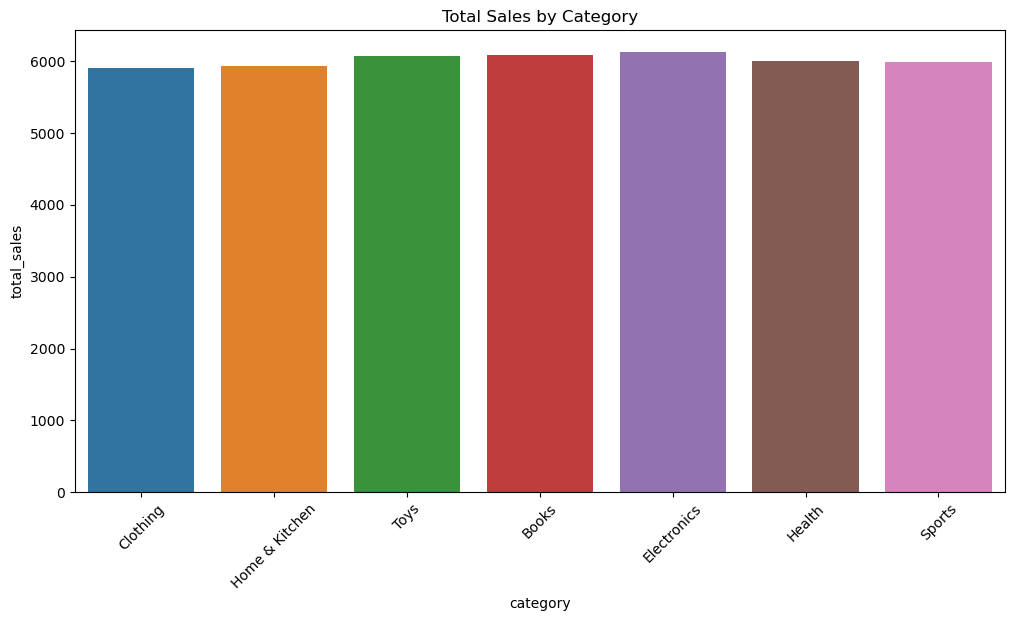

In [24]:
# Sales distribution by category
plt.figure(figsize=(12,6))
sns.barplot(x='category', y='total_sales', data=df, ci=None)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

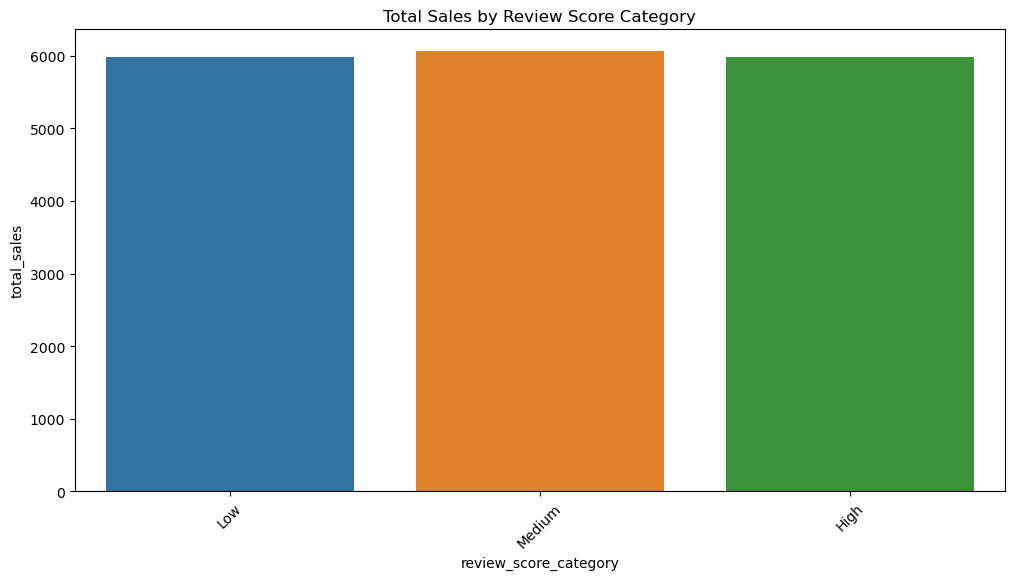

In [25]:
# Sales distribution by review score category
plt.figure(figsize=(12,6))
sns.barplot(x='review_score_category', y='total_sales', data=df, ci=None)
plt.title('Total Sales by Review Score Category')
plt.xticks(rotation=45)
plt.show()

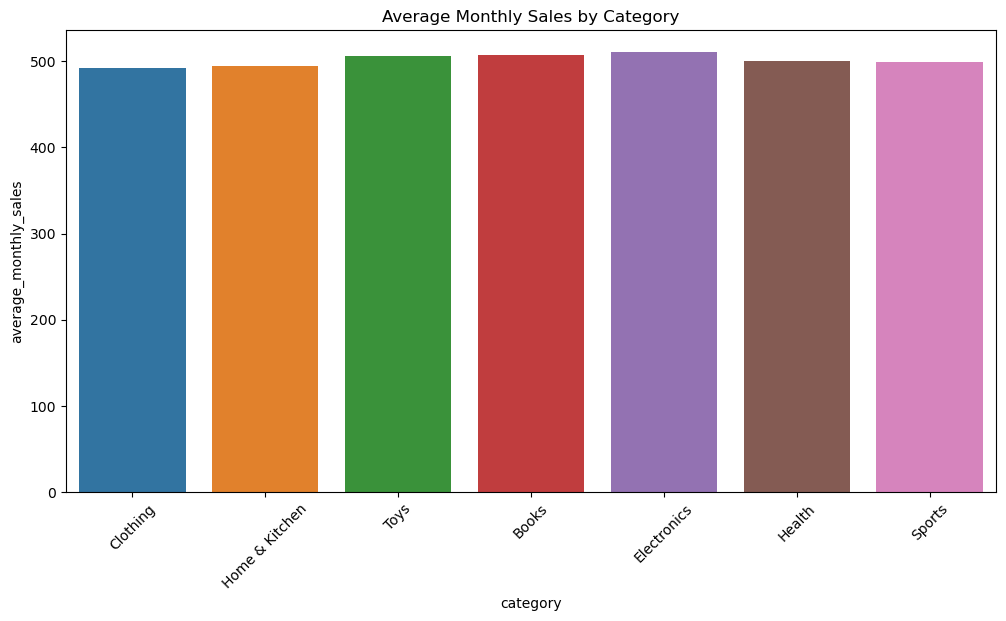

In [26]:
# Average monthly sales by category
plt.figure(figsize=(12,6))
sns.barplot(x='category', y='average_monthly_sales', data=df, ci=None)
plt.title('Average Monthly Sales by Category')
plt.xticks(rotation=45)
plt.show()

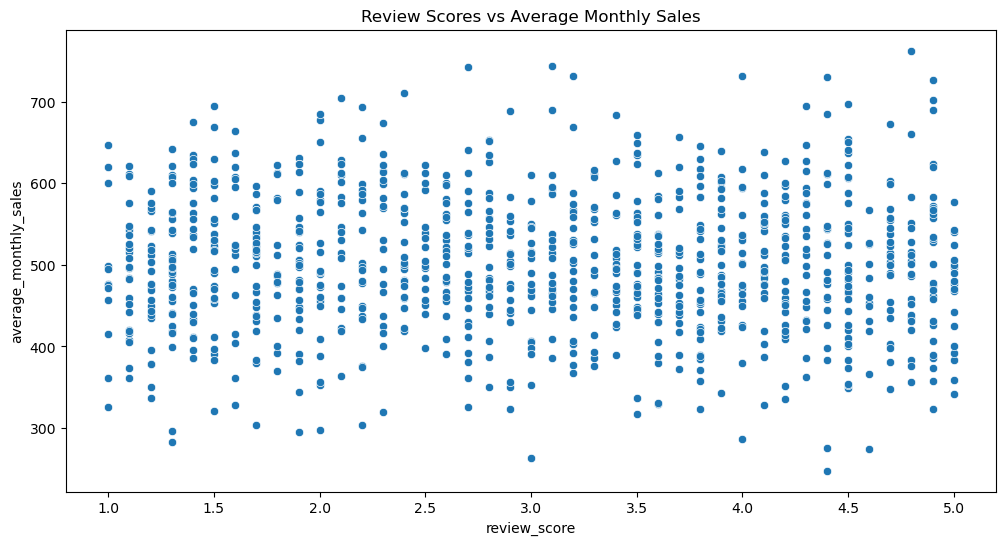

In [27]:
# Review scores vs average monthly sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_score', y='average_monthly_sales', data=df)
plt.title('Review Scores vs Average Monthly Sales')
plt.show()

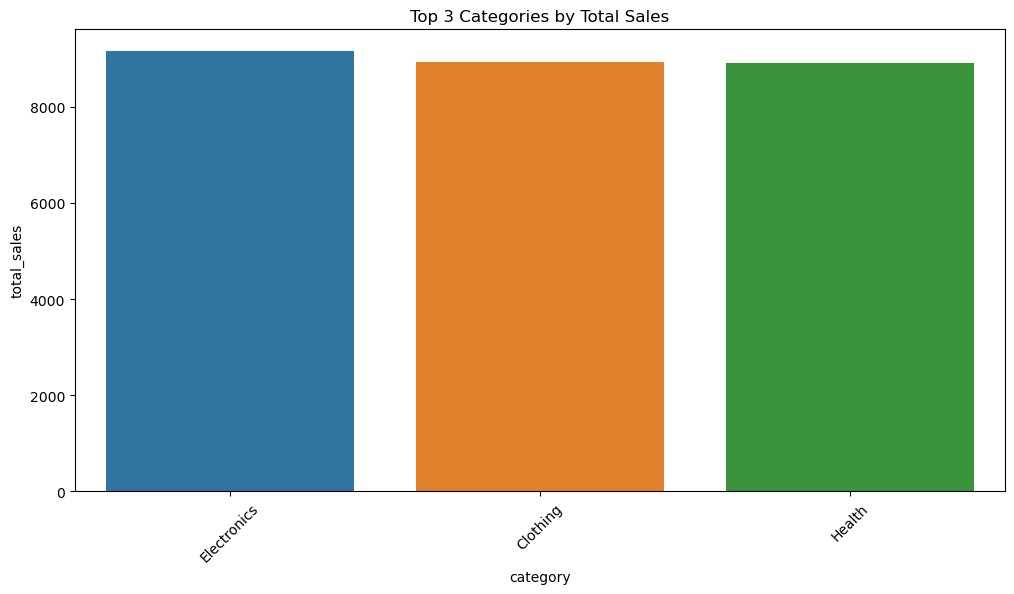

In [31]:
# Top 3 categories by total sales
top_3_categories = df.nlargest(3, 'total_sales')
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='total_sales', data=top_3_categories, ci=None)
plt.title('Top 3 Categories by Total Sales')
plt.xticks(rotation=45)
plt.show()

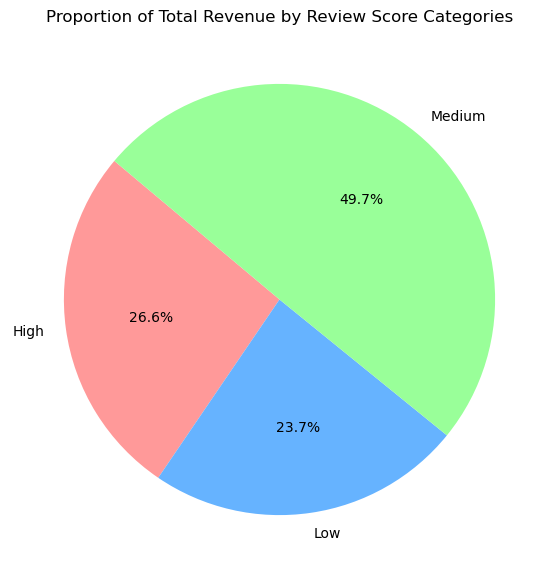

In [32]:
# Grouping by review score category and calculating total revenue for each category
revenue_by_review_category = df.groupby('review_score_category')['total_revenue'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
revenue_by_review_category.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Proportion of Total Revenue by Review Score Categories')
plt.ylabel('')  # This removes the 'y' label
plt.show()

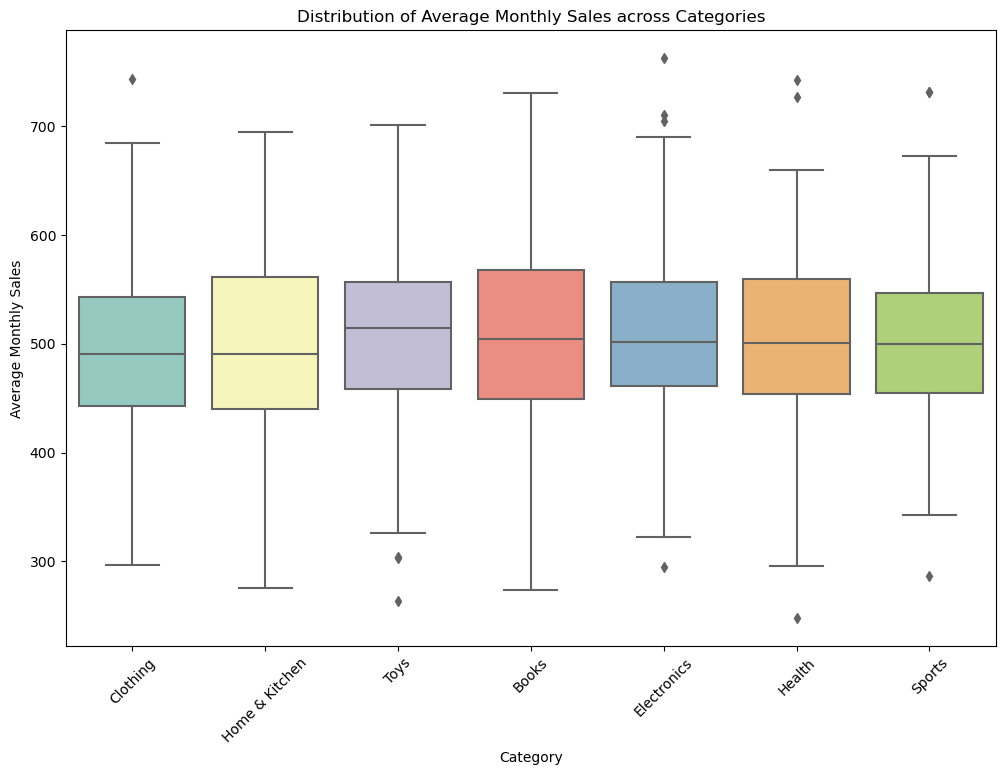

In [33]:
# Box plot of average monthly sales across categories
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='category', y='average_monthly_sales', palette='Set3')
plt.title('Distribution of Average Monthly Sales across Categories')
plt.xlabel('Category')
plt.ylabel('Average Monthly Sales')
plt.xticks(rotation=45) 
plt.show()

In [14]:
print(os.getcwd())

C:\Users\Luisa


In [23]:
# Export datafram to a csv
df.to_csv('ecommerce_sales_analysis.csv', index=False)

C:\Users\Luisa
